# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [3]:
# Set the API base URL
#url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qionghu
Processing Record 2 of Set 1 | hobe sound
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | kristiansund
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | puerto deseado
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | port shepstone
Processing Record 16 of Set 1 | jiazi
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | akureyri
Processing Record 23 of Set 1 | port l

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qionghu,28.8430,112.3522,66.13,91,100,10.07,CN,1682674138
1,hobe sound,27.0595,-80.1364,70.95,89,0,0.00,US,1682674138
2,utrik,11.2278,169.8474,81.09,83,56,20.33,MH,1682674030
3,adamstown,-25.0660,-130.1015,74.68,69,22,9.82,PN,1682673997
4,tura,25.5198,90.2201,91.13,29,100,7.25,IN,1682674140


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qionghu,28.8430,112.3522,66.13,91,100,10.07,CN,1682674138
1,hobe sound,27.0595,-80.1364,70.95,89,0,0.00,US,1682674138
2,utrik,11.2278,169.8474,81.09,83,56,20.33,MH,1682674030
3,adamstown,-25.0660,-130.1015,74.68,69,22,9.82,PN,1682673997
4,tura,25.5198,90.2201,91.13,29,100,7.25,IN,1682674140


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

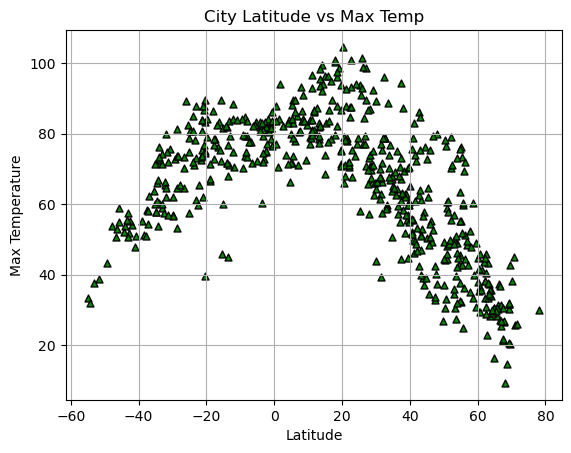

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='^', s=25
            , c='g', edgecolors='black', alpha=0.95)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Max Temp')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

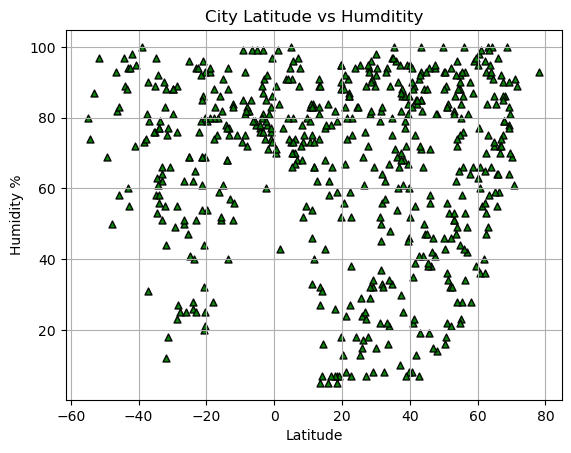

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='^', s=25, c='g', edgecolors='black', alpha=0.95)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Humditity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

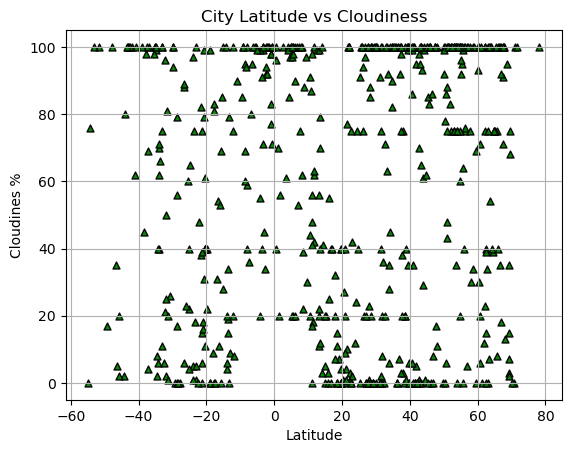

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker ='^', s=25, c='g', edgecolors='black', alpha=0.95)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudines %')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

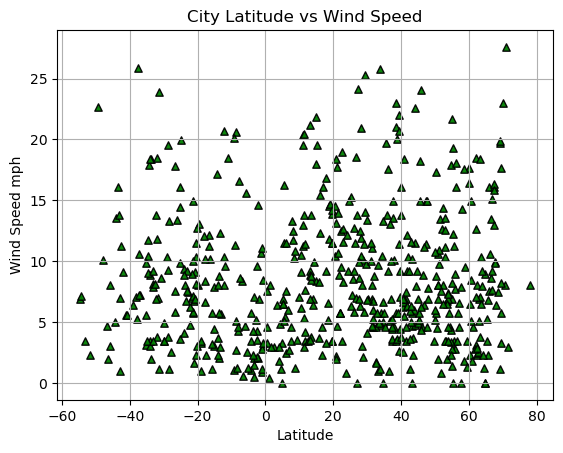

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker ='^', s=28, c='g', edgecolors='black', alpha=0.95)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Fig4.png")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = -0.28x + 70.14
The r-squared is: 0.22818878379061114


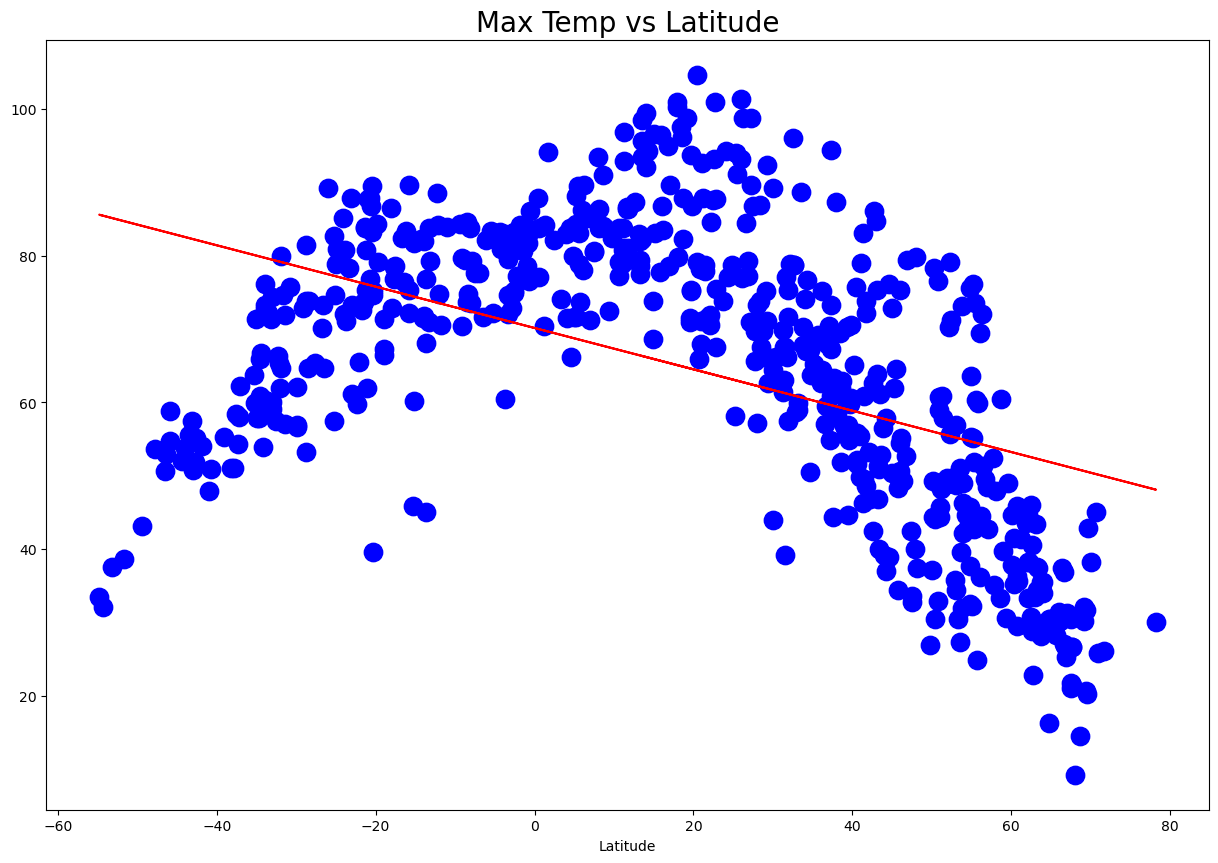

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temp vs Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('',fontsize =10)


print(f"The r-squared is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qionghu,28.8430,112.3522,66.13,91,100,10.07,CN,1682674138
1,hobe sound,27.0595,-80.1364,70.95,89,0,0.00,US,1682674138
2,utrik,11.2278,169.8474,81.09,83,56,20.33,MH,1682674030
4,tura,25.5198,90.2201,91.13,29,100,7.25,IN,1682674140
6,iqaluit,63.7506,-68.5145,28.13,92,100,10.36,CA,1682674049


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,74.68,69,22,9.82,PN,1682673997
5,avarua,-21.2078,-159.7750,75.25,69,75,5.75,CK,1682674017
11,waitangi,-43.9535,-176.5597,53.82,89,80,13.51,NZ,1682673994
12,puerto deseado,-47.7503,-65.8938,53.71,50,100,10.13,AR,1682674145
14,port shepstone,-30.7414,30.4550,75.79,66,26,8.59,ZA,1682674146


###  Temperature vs. Latitude Linear Regression Plot

y = -0.91x + 96.65
The r-squared is: 0.6861973089820572


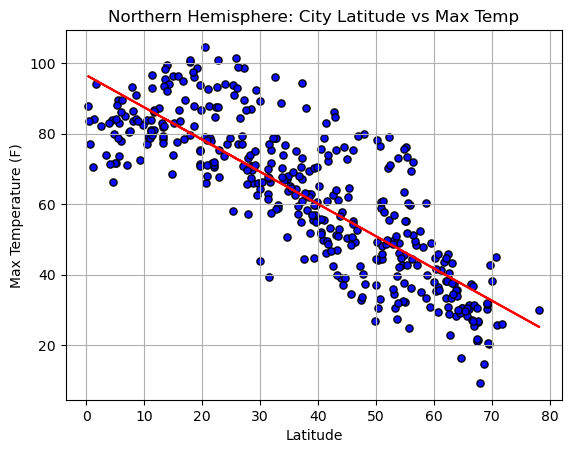

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=27, c='blue', edgecolors='black', alpha=0.95)
plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

y = 0.65x + 84.96
The r-squared is: 0.502065949611286


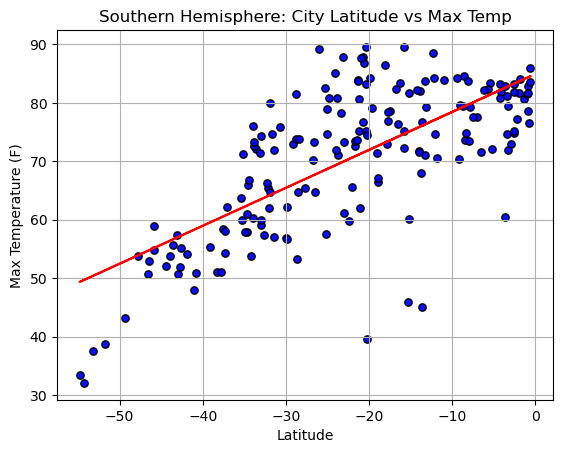

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.12x + 60.54
The r-squared is: 0.006970995297423782


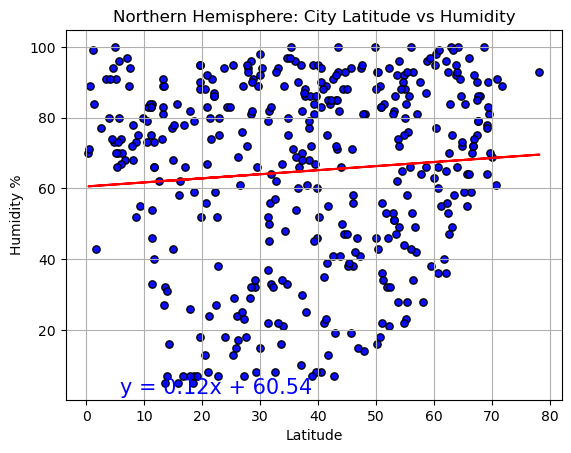

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

y = 0.17x + 75.21
The r-squared is: 0.012584388105496518


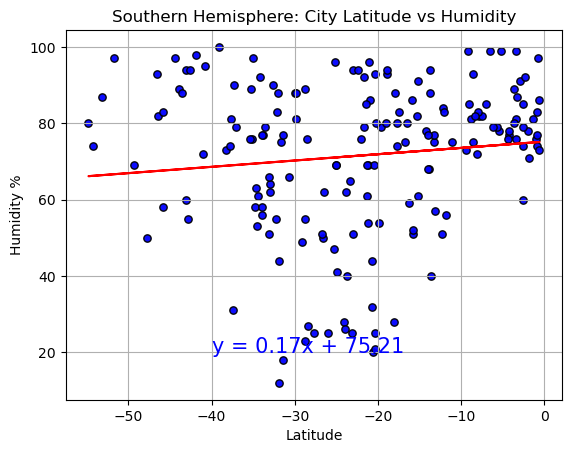

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,20), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.28x + 48.41
The r-squared is: 0.01773953823843506


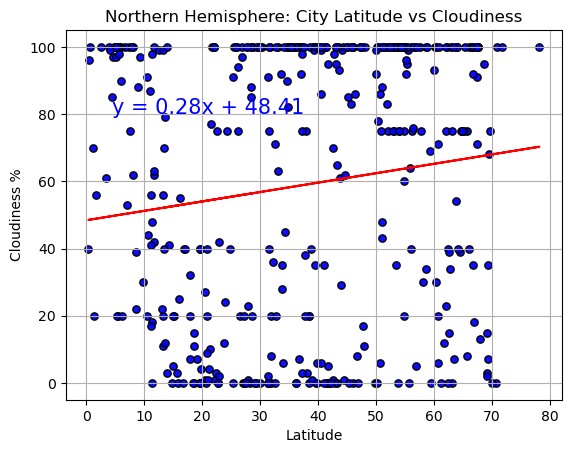

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(4.5,80), fontsize=15, color='b')
plt.show()

y = 0.38x + 64.98
The r-squared is: 0.018738640006936532


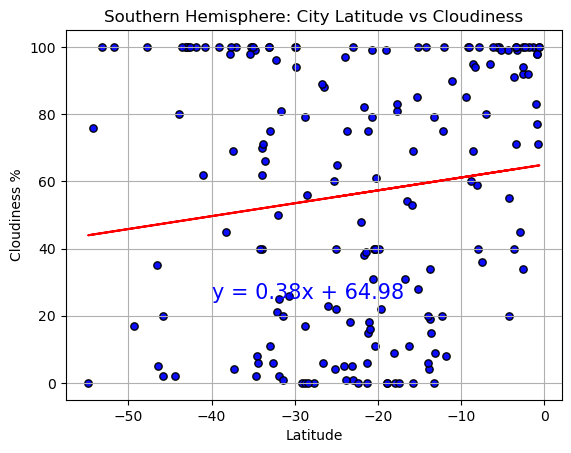

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x + 8.59
The r-squared is: 7.859096805602277e-06


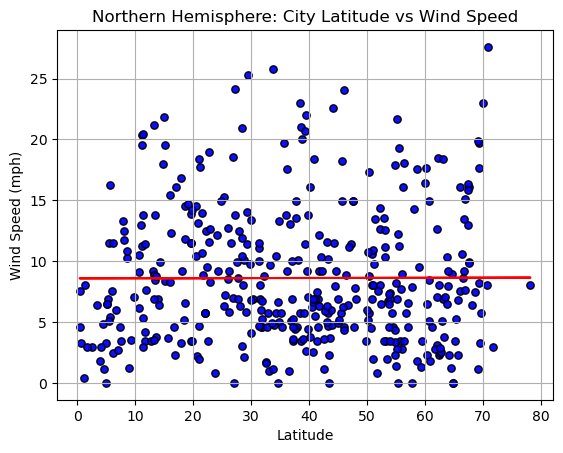

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,40), fontsize=15, color='b')
plt.show()

y = -0.07x + 6.29
The r-squared is: 0.03031387925614667


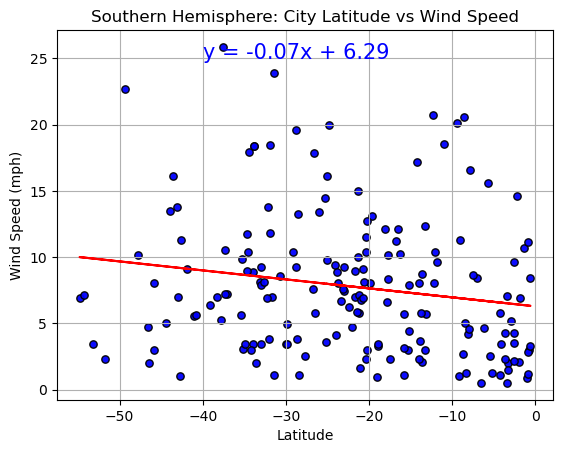

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=28, c='blue', edgecolors='black', alpha=0.95)
plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE